d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22122 (\N{CJK UNIFIED IDEOGRAPH-566A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22768 (\N{CJK UNIFIED IDEOGRAPH-58F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28388 (\N{CJK UNIFIED IDEOGRAPH-6EE4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserW

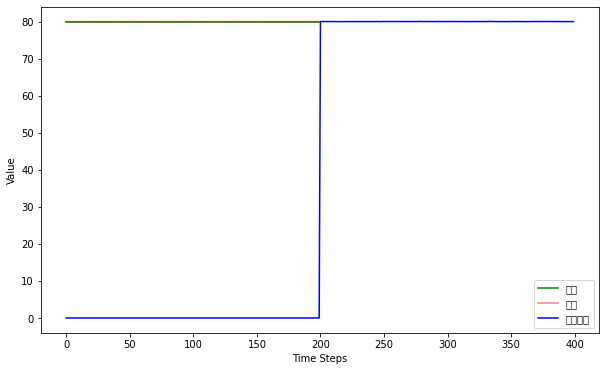

In [14]:
import numpy as np
import matplotlib.pyplot as plt

true = np.linspace(80, 80, 200)  # 生成一个平行于x轴的直线轨迹
noise_degree = 0.01  # 设置噪声程度
#噪声
measured = true + noise_degree * np.random.randn(200)


# 卡尔曼滤波参数
f_mat = 1  #状态转移矩阵
h_mat = 1  #观测矩阵
q_mat = 0.001  #过程噪声协方差
r_mat = noise_degree ** 2 #噪声协方差
p_mat = 1  #初始估计协方差
x_mat = measured[0]  #初始状态估计

#结果
# y = []
y = [0] * len(measured) #设置初始为0


#卡尔曼滤波器的5个公式
for measurement in measured:
    #预测
    x_predict = f_mat * x_mat
    p_predict = f_mat * p_mat * f_mat + q_mat
    #更新
    kalman = p_predict * h_mat / (h_mat * p_predict * h_mat + r_mat)
    x_mat = x_predict + kalman * (measurement - h_mat * x_predict)
    p_mat = (1 - kalman * h_mat) * p_predict
    y.append(x_mat)



#画图
plt.figure(figsize=(10, 6))
plt.plot(true, label='真值', color='green')
plt.plot(measured, label='噪声', color='red', alpha=0.5)
plt.plot(y, label='滤波效果', color='blue')
plt.legend(loc='lower right')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()


